### Overview
This notebook filters out Software Development and Data Science jobs in a dataset of Pakistani job market, and performs data analysis and visualization to explore the following:
* The distribution of years of experience required.
* Companies offering the most jobs.
* Distribution of jobs among Cities.
* The most in-demand skill and tools.
* Top keywords used in job ads.

Note: I'm not sure about how the data was collected and how much the results related to CS/IT can be generalized.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.express as px
from wordcloud import WordCloud
from operator import itemgetter
from nltk.tokenize import word_tokenize
import spacy
sp = spacy.load('en_core_web_sm')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../input/pakistans-job-market/Pakistan Available Job Dec 19 - Mar-21.csv')
df.head(5)

,Job Name,label,Company Name,Job Type,Experience Required,Department,JD,City,Date Posted
0,"Full Time New Job Positions .Net, .Netcore, Fl...",Premium Job,"Nayel Solutions, Pakistan",Full Time Jobs,2 Years Job Exp.,IT Jobs,"New Job Positions .net, .netcore, flutter, Tea...",Islamabad,12-Mar-21
1,Full Time Senior Web Developer Jobs in Pakistan,Premium Job,"Eurosoft Tech Private Limited, Pakistan",Full Time Jobs,2 Years Job Exp.,IT Jobs,We are looking for an experienced Web Develope...,Karachi,12-Mar-21
2,Full Time Russian Speakers Jobs in Pakistan,Premium Job,"ICM JAPAN, Pakistan",Full Time Jobs,< 1 Year,Customer Service Jobs,International clients dealing exposure (B2B).S...,Karachi,12-Mar-21
3,Full Time Customer Support Specialist - Intern...,Premium Job,"ibex, Pakistan",Full Time Jobs,Job for Fresh Graduates,Customer Service Jobs,Responsible for acting as a liaison between ou...,Islamabad,9-Mar-21
4,Full Time English Speaker - International Busi...,Premium Job,"ICM JAPAN, Pakistan",Full Time Job,< 1 Year,Customer Service Job,International clients dealing exposure (B2B) a...,Karachi,5-Mar-21


In [3]:
df['Job Name'] = df['Job Name'].str.upper()
df['JD'] = df['JD'].str.upper()
df['City'] = df['City'].str.upper()
df['Company Name'] = df['Company Name'].str.upper()
df['Experience Required'] = df['Experience Required'].str.upper()

In [4]:
depList = list(df['Department'].unique())
depList.sort()
print(depList)

['Accounting Job', 'Accounting Jobs', 'Admin Job', 'Admin Jobs', 'Agriculture Job', 'Architect Job', 'Architect Jobs', 'Autos Job', 'Autos Jobs', 'Aviation Job', 'Aviation Jobs', 'Banking Job', 'Banking Jobs', 'Business Opportunity Job', 'Business Opportunity Jobs', 'Career Fairs Jobs', 'Commission Job', 'Computer Hardware Job', 'Computer Hardware Jobs', 'Computer Software Job', 'Computer Software Jobs', 'Construction Job', 'Construction Jobs', 'Consulting Job', 'Consulting Jobs', 'Consumer Job', 'Consumer Jobs', 'Customer Service Job', 'Customer Service Jobs', 'Economics Job', 'Economics Jobs', 'Education Job', 'Education Jobs', 'Electronics Job', 'Electronics Jobs', 'Engineering Job', 'Engineering Jobs', 'Finance Job', 'Finance Jobs', 'Government Job', 'Government Jobs', 'HR & Recruiting Job', 'HR & Recruiting Jobs', 'Healthcare Job', 'Healthcare Jobs', 'Hospitality Job', 'Hospitality Jobs', 'Housekeeping Job', 'Housekeeping Jobs', 'IT Job', 'IT Jobs', 'Insurance Job', 'Insurance Job

In [5]:
csList = ['Computer Software Job','Computer Software Jobs','IT Job','IT Jobs','Web & E-commerce Job','Web & E-commerce Jobs']
df.Department.replace(csList, ['CS/IT']*len(csList), inplace=True)
dfc = df[ df.Department=='CS/IT']

In order to filter out useful keywords, I'm creating a list of stopwords based on the domain and analysis of common words used in CS/IT job descriptions, and combining it with general English stopwords.

In [6]:
all_stopwords = sp.Defaults.stop_words
all_stopwords = list(all_stopwords)
all_stopwords += [',','BEST','EXPERIENCE','KNOW','PROBLEM','INCLUDE','GOALS','GOOD',\
'UNDERSTANDING','USER','USERS','USE','SEEKING','POSITION','WANTS','OPEN','INTERESTED',\
'FIELD','HELP','TEAMS','FIND','MAKING','LIKE','OPPORTUNITIES','APPLYING','DEVELOPING',\
'NEEDED','IMPLEMENT','&','TEAM','BUILD','WORK','WORKING','REQUIRED','REQUIRES'\
 'OPPORTUNITY','PERFORM','UNDERSTAND','SKILL','SKILLS','JOB','JOIN','FOCUS','CREATE',\
'REQUIREMENTS','OFFERS','OFFER','REQUIREMENT','LOOKING','RESPONSIBILITIES',\
'TECHNICAL','COMPANY','CANDIDATE','.',';','(',')',':','INCLUDING','CONCEPTS','MAINTAIN', \
 'YEARS','CREATING','POSITIONS','PERMANENT','INCLUDES','EXPERIENCES','REQUIRE',\
 'ETC','PRIORITY','PERFORMANCE','JOBS','CONTRACT','HIRE','HIRING','SKILLED','PROVEN',\
 'STRONG','SPECIFICATIONS','DIFFERENT','FOLLOWING','IMPLEMENTING','LOCATION','ROLES',\
 'DEVELOP','?','NEW','LEARN','MINIMUM','SOLUTIONS','MULTIPLE','RELATED','MONTHS','BASED',\
 'DEPENDING','DEPENDS','IDEAL','IDEALLY','SKILLSET','ENCOURAGE','PARTICIPATE','ABLE',\
 'PREPARING','FOCUSED','GROWTH','MANAGING','MAINLY','IMPROVE','KNOWLEDGE',\
 'CANDIDATES','CUSTOMER','NEEDS','HANDLE','TIME','SR.', \
 'EXPERIENCED','RESPONSIBLE','KNOWLEDGE','NEED','PROJECTS','HAVING','TECHNOLOGIES',\
 'TALENTED','SENIOR','-','_','ABLE','CLIENTS','HIGHLY','QUALITY','ROLE','EXCELLENT','EXPERT',\
 'YEAR','/','SENIOR','APPLY','PASSIONATE','FRESH','OPPORTUNITY','BUILDING','GROWING','MOTIVATED','PAKISTAN','PROJECT','#','OFFICE']
all_stopwords = set( s.upper() for s in all_stopwords  )

In [7]:
def isSWJob(s):
    keywords = ['SOFTWARE','WEB','DEVELOPER','PROGRAMM','APP']
    if any( word in s for word in keywords ):
        return True
    else:
        return False

def isDSJob(s):
    keywords = ['DATA SCI','DATASCI','DATA ANA','ML ENG','ARTIFICIAL','INTELLIGENCE','DATA ENG',\
            'AI ENG','MACHINE LEARNING','NATURAL LANGUAGE','COMPUTER VISION','NLP']
    if any( word in s for word in keywords ):
        return True
    else:
        return False

Software Development and Data Science/AI/ML jobs are being filtered about by looking for some keywords, at least one of which is very likely to be in all relevant job descriptions.
There are many irrelevant jobs mistakenly placed in the department, which are also being filtered out.

In [8]:
dfc['Name_JD'] = df['Job Name']+' '+df['JD']
dfcSW = dfc[ dfc['Name_JD'].apply(isSWJob) ]
dfcDS = dfc[ dfc['Name_JD'].apply(isDSJob) ]

print('Total CS and IT Jobs :',dfc.shape[0])
print('Dat Scince/AI/ML Jobs :',dfcDS.shape[0])
print('Software Dev Jobs :',dfcSW.shape[0])

Total CS and IT Jobs : 2869
Dat Scince/AI/ML Jobs : 32
Software Dev Jobs : 2096


It can be observed that there were only 32 Data Science/AI/ML jobs which is only 1.5 % of 2096, the number of Software Development jobs. However I personally come across a lot of DS/AI/ML jobs and the dataset is probably not focused on good platforms for such jobs, and CS/IT jobs in general. Still it's true that those jobs are currently a small fraction of all CS/IT jobs. 

In [9]:
def getExpYears(s):
    tkns = s.split(' ')
    if 'FRESH' in tkns:
        return 0   
    else:
        for i,wrd in enumerate(tkns):
            if wrd.isnumeric():
                if i>0:
                    if tkns[i-1]=='<':
                        return int(wrd) - 1
                    elif tkns[i-1]=='>':
                        return int(wrd) + 1
                return int(wrd)
    return 0

Text(0, 0.5, 'Count')

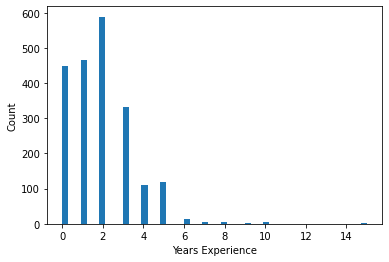

In [10]:
dfcSW['Exp_Years'] = dfcSW['Experience Required'].apply(getExpYears)
ax = plt.hist(dfcSW['Exp_Years'],bins=50)
plt.xlabel("Years Experience")
plt.ylabel("Count")

It can be observed that most jobs are for 1-2 years experience, however jobs for fresh graduates are not much lower than that. Jobs for > 2 years experience decline.

Text(0, 0.5, 'Company')

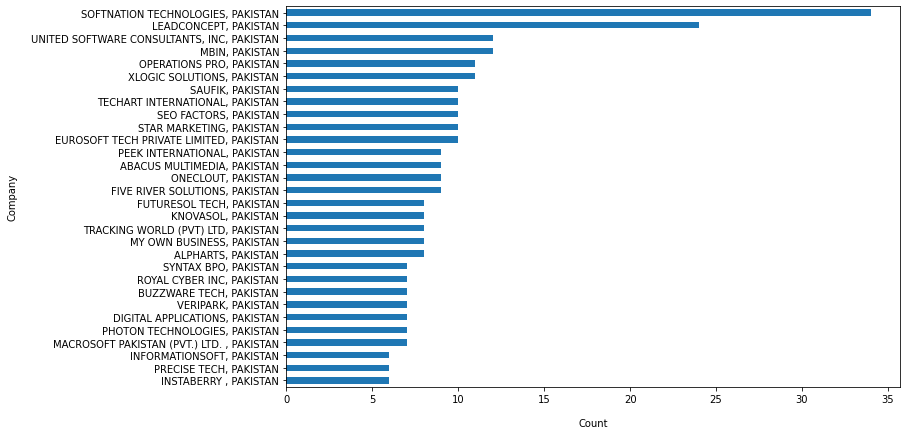

In [11]:
ax = dfcSW['Company Name'].value_counts().iloc[:30].plot(kind='barh', figsize=(11,7))
ax.invert_yaxis()
plt.xlabel("Count", labelpad=14)
plt.ylabel("Company", labelpad=14)

These are the top 30 companies wrt number of jobs, according to the data. It is a bit unituitive as I know only two of them.

Text(0, 0.5, 'City')

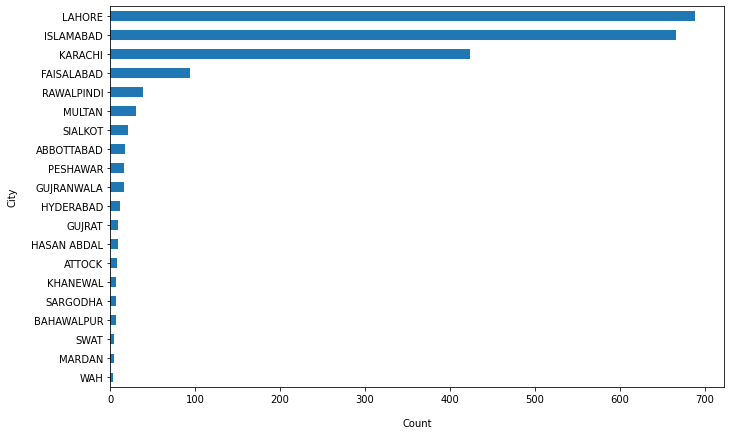

In [12]:
ax = dfcSW['City'].value_counts().iloc[:20].plot(kind='barh', figsize=(11,7))
ax.invert_yaxis()
plt.xlabel("Count", labelpad=14)
plt.ylabel("City", labelpad=14)

According to the data, Lahore and Islamabad, have more software development jobs than Karachi, although it is a bigger city.

In [13]:
def extractValidKeywords(s):
    global all_stopwords,wordDct,skillDct
    text_tokens = word_tokenize(s)
    kwList = [word for word in text_tokens if not word in all_stopwords]
    for wrd in kwList:
        if wrd in wordDct:
            wordDct[wrd] += 1
        else:
            wordDct[wrd] = 1
        if wrd in skillDct:
            skillDct[wrd] += 1
    return kwList

These skills keywords are based on the common software development tools according to internet, while also considering the keywords in the data. The frequencies of those skills are computed from the job descriptions.

In [14]:
wordDct = {}
skillSet = {'JAVA','JAVASCRIPT','PYTHON','C','C++','C#','SWIFT','PHP',\
            '.NET','ASP.NET','REACT','HTML','CSS','IOS','ANDROID','SQL','ROR','RUBY',\
            'SCALA','OBJECTIVE-C','KOTLIN','ANGULAR','TYPESCRIPT','PERL','UNREAL',\
            'GOLANG','GCP','AZURE','AWS','UNITY','MONGODB','LARAVEL','FLASK','RAILS',\
            'DJANGO','EXPRESS','NODE','NODE.JS','SPRING','VUE','VUE.JS','EMBER',
            'FLUTTER','XARMIN','DOCKER','SWIFTIC','BASH','BOOTSTRAP','ANGULAR.JS',\
            'WORDPRESS','CODEIGNITOR','POSTGRESQL','MYSQL','ORACLE'}
skillDct = { s:0 for s in skillSet }

dfcSW['keywords'] = dfcSW['Name_JD'].apply(extractValidKeywords)

In [15]:
skillDct['NODE'] += skillDct['NODE.JS']
del skillDct['NODE.JS']
skillDct['VUE'] += skillDct['VUE.JS']
del skillDct['VUE.JS']
skillDct['ANGULAR'] += skillDct['ANGULAR.JS']
del skillDct['ANGULAR.JS']
skillDct['.NET'] += skillDct['ASP.NET']
del skillDct['ASP.NET']
skillDct['ROR'] += skillDct['RAILS']
del skillDct['RAILS']
todel = []
for k,v in skillDct.items():
    if v<5:
        todel.append(k)
for dk in todel:
    del skillDct[dk]
    
skilldfSW = pd.DataFrame( list(skillDct.items()),columns=['Skill','Count'] )

In [16]:
skilldfSW.sort_values(by='Count', ascending=True, inplace=True)
fig = px.bar(skilldfSW, x="Count", y="Skill", orientation='h',width=900, height=700)
fig.show()

The results according to this dataset indicate that seemingly older tools like PHP/Laravel and Wordpress have most jobs in the local market. Android app dev also seems very popular. It is also surprising to see more Game Dev and Unity jobs compared to Javascript and React etc.

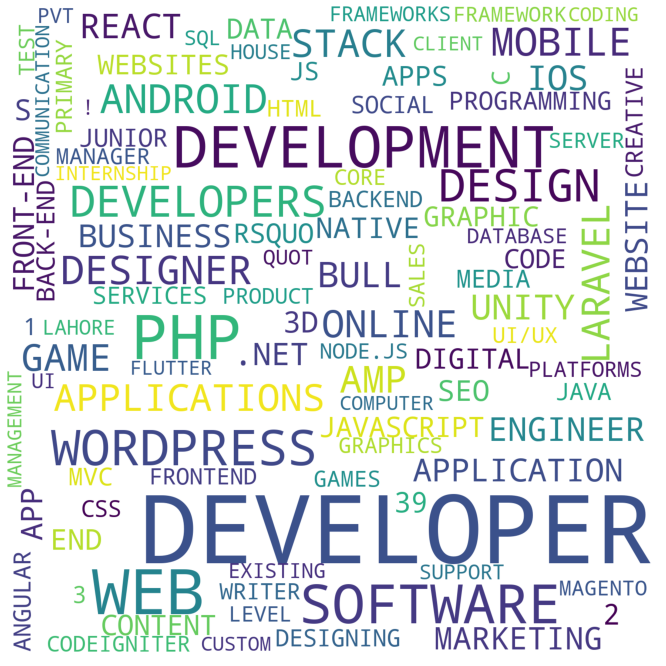

In [17]:
topN = 100
wordDct2 = dict(sorted(wordDct.items(), key = itemgetter(1), reverse = True)[:topN])
wordcloud = WordCloud(background_color='white',width=1500,height=1500).generate_from_frequencies(wordDct2)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Analysis of Data Science/AI/ML would begin now. We have a small number of observations and results might not be so too generalizable. 

Text(0, 0.5, 'Count')

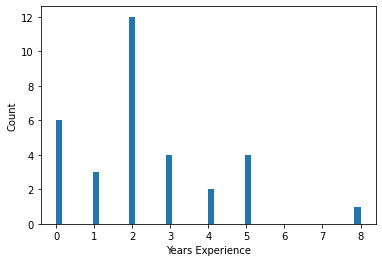

In [18]:
dfcDS['Exp_Years'] = dfcDS['Experience Required'].apply(getExpYears)
ax = plt.hist(dfcDS['Exp_Years'],bins=50)
plt.xlabel("Years Experience")
plt.ylabel("Count")

Text(0, 0.5, 'Company')

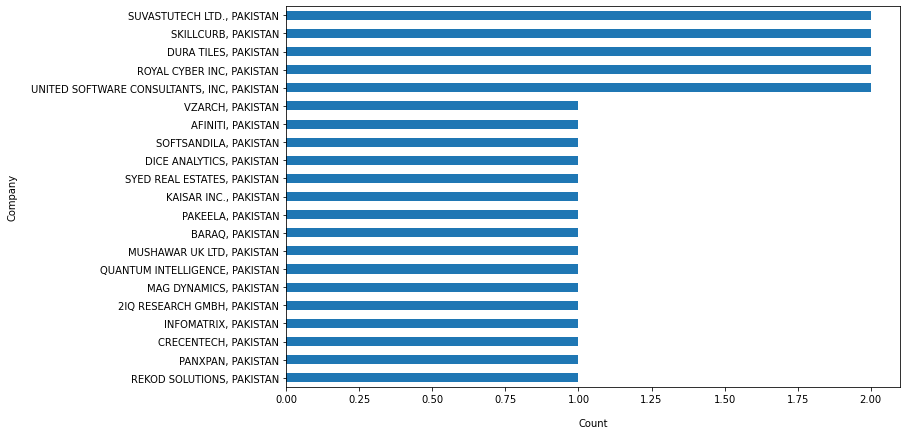

In [19]:
ax = dfcDS['Company Name'].value_counts().iloc[:30].plot(kind='barh', figsize=(11,7))
ax.invert_yaxis()
plt.xlabel("Count", labelpad=14)
plt.ylabel("Company", labelpad=14)

The companies with most DS/AI jobs are also new and a bit surprising for me as I've done considerable research on local DS/AI companies. I only knew about three of them. However there are only 1 or 2 job posts from these companies and the results might have been different if the dataset was larget and more representative.

Text(0, 0.5, 'City')

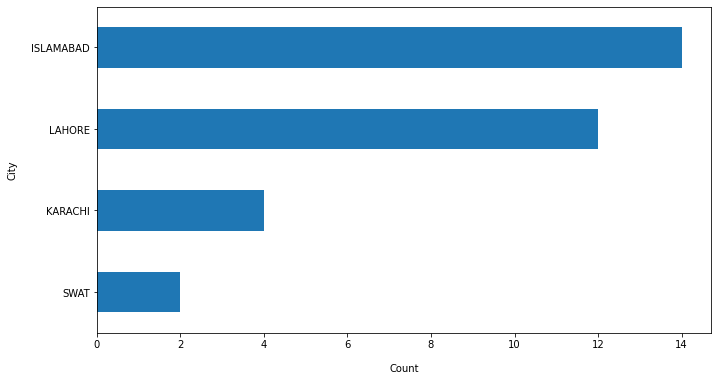

In [20]:
ax = dfcDS['City'].value_counts().iloc[:10].plot(kind='barh', figsize=(11,6))
ax.invert_yaxis()
plt.xlabel("Count", labelpad=14)
plt.ylabel("City", labelpad=14)

Islamabad has more DS/AI jobs as compared to Lahore, unlike general software development and the difference between Islamabad/Lahore and Karachi is even larger. Finding posts from Swat was also a bit surprising.

The skills used here are mostly based on what is actually present in the data. 32 observations were small enough for manually exploring to get the skill keywords. Many common Data Science/AI/ML tools and keywords are not present in the data, so not checked.

In [21]:
skillSetDS = {'MODEL','BUSINESS INTELLIGENCE','QLIK','ALGORITHMS','ARTIFICIAL INTELLIGENCE',\
'DATA ENGINEER','RESEARCH','PYTHON','CLOUD','DATA ANALYSIS','ANALYST','NLP','DEEP LEARNING',\
'DATABASE','ETL','C++',' R ','MACHINE LEARNING','GEOSPATIAL','VISUALIZATION',\
'CHATBOT','DATA SCIENTIST','REPORT','DATA COLLECTION','MOBILE',' WEB ','COMPUTER VISION'}
skillDctDS = { s:0 for s in skillSetDS }

wordDctDS = {}

for i in range( dfcDS.shape[0] ):
    nameJD = dfcDS['Name_JD'].iloc[i]
    for skill in skillSetDS:
        if skill in nameJD:
            skillDctDS[skill] += 1
    text_tokens = word_tokenize(nameJD)
    kwList = [word for word in text_tokens if not word in all_stopwords]
    for wrd in kwList:
        if wrd in wordDctDS:
            wordDctDS[wrd] += 1
        else:
            wordDctDS[wrd] = 1
            
todel = []
for k,v in skillDctDS.items():
    if v<1:
        todel.append(k)
for dk in todel:
    del skillDctDS[dk]
    
skilldfDS = pd.DataFrame( list(skillDctDS.items()),columns=['Skill','Count'] )

In [22]:
skilldfDS.sort_values(by='Count', ascending=True, inplace=True)
fig = px.bar(skilldfDS, x="Count", y="Skill", orientation='h',width=800, height=600)
fig.show()

Machine Learning, Data Analysis and Database are among the common skills. Data Analyst and BI jobs seem more common. Machine Learning and Data Science/Data Engineering tools and Deep Learning are not mentioned.

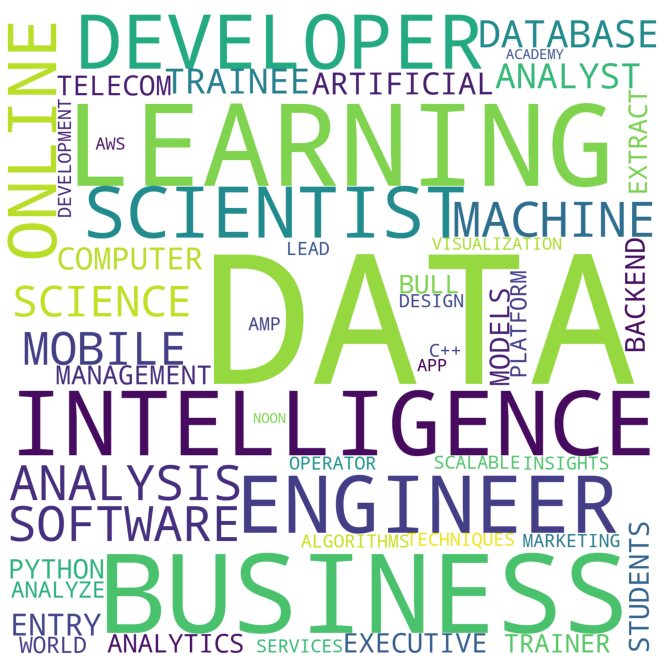

In [23]:
topN = 50
wordDct2 = dict(sorted(wordDctDS.items(), key = itemgetter(1), reverse = True)[:topN])
wordcloud = WordCloud(background_color='white',width=1500,height=1500).generate_from_frequencies(wordDct2)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

The word cloud shows the top 50 keywords. Telecom, Business/BI and Marketing domains seem common. Jobs requiring mobile app developers to work on AI were also found.  